In [11]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# EDA

In [17]:
data = pd.read_csv(r"../data/Combined_dataset.csv")
x_col = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'cd_account', 'securities']
products = ["loan", "term_deposit", "cd_account", "securities"]

In [18]:
data.rename({"y": "term_deposit"}, axis="columns", inplace=True)

In [19]:
data

,age,job,marital,education,default,balance,housing,loan,contact,duration,...,previous,poutcome,term_deposit,cd_account,securities,TransactionFrequency,Recency,AverageTransactionAmount,month,day
0,58,management,married,tertiary,no,2143,1,0,unknown,261,...,0,unknown,no,0,0,2,25,807.50,may,5
1,44,technician,single,secondary,no,29,1,0,unknown,151,...,0,unknown,no,0,0,1,48,60.00,may,5
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,76,...,0,unknown,no,0,0,2,44,995.00,may,5
3,35,management,married,tertiary,no,231,1,0,unknown,139,...,0,unknown,no,0,0,1,56,819.00,may,5
4,28,management,single,tertiary,no,447,1,1,unknown,217,...,0,unknown,no,0,0,1,54,641.00,may,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43349,51,technician,married,tertiary,no,825,0,0,cellular,977,...,0,unknown,yes,0,0,1,53,215.00,nov,17
43350,71,retired,divorced,primary,no,1729,0,0,cellular,456,...,0,unknown,yes,0,0,1,61,5999.00,nov,17
43351,72,retired,married,secondary,no,5715,0,0,cellular,1127,...,3,success,yes,0,0,1,36,1156.34,nov,17
43352,57,blue-collar,married,secondary,no,668,0,0,telephone,508,...,0,unknown,no,0,0,1,37,488.00,nov,17


Products: ["loan", "term_deposit", "cd_account", "securities"]

In [20]:
categorical_columns = list(data.select_dtypes(include=['object']).columns) + ["term_deposit", "cd_account", "securities"]
N = len(categorical_columns)
print(N)

11


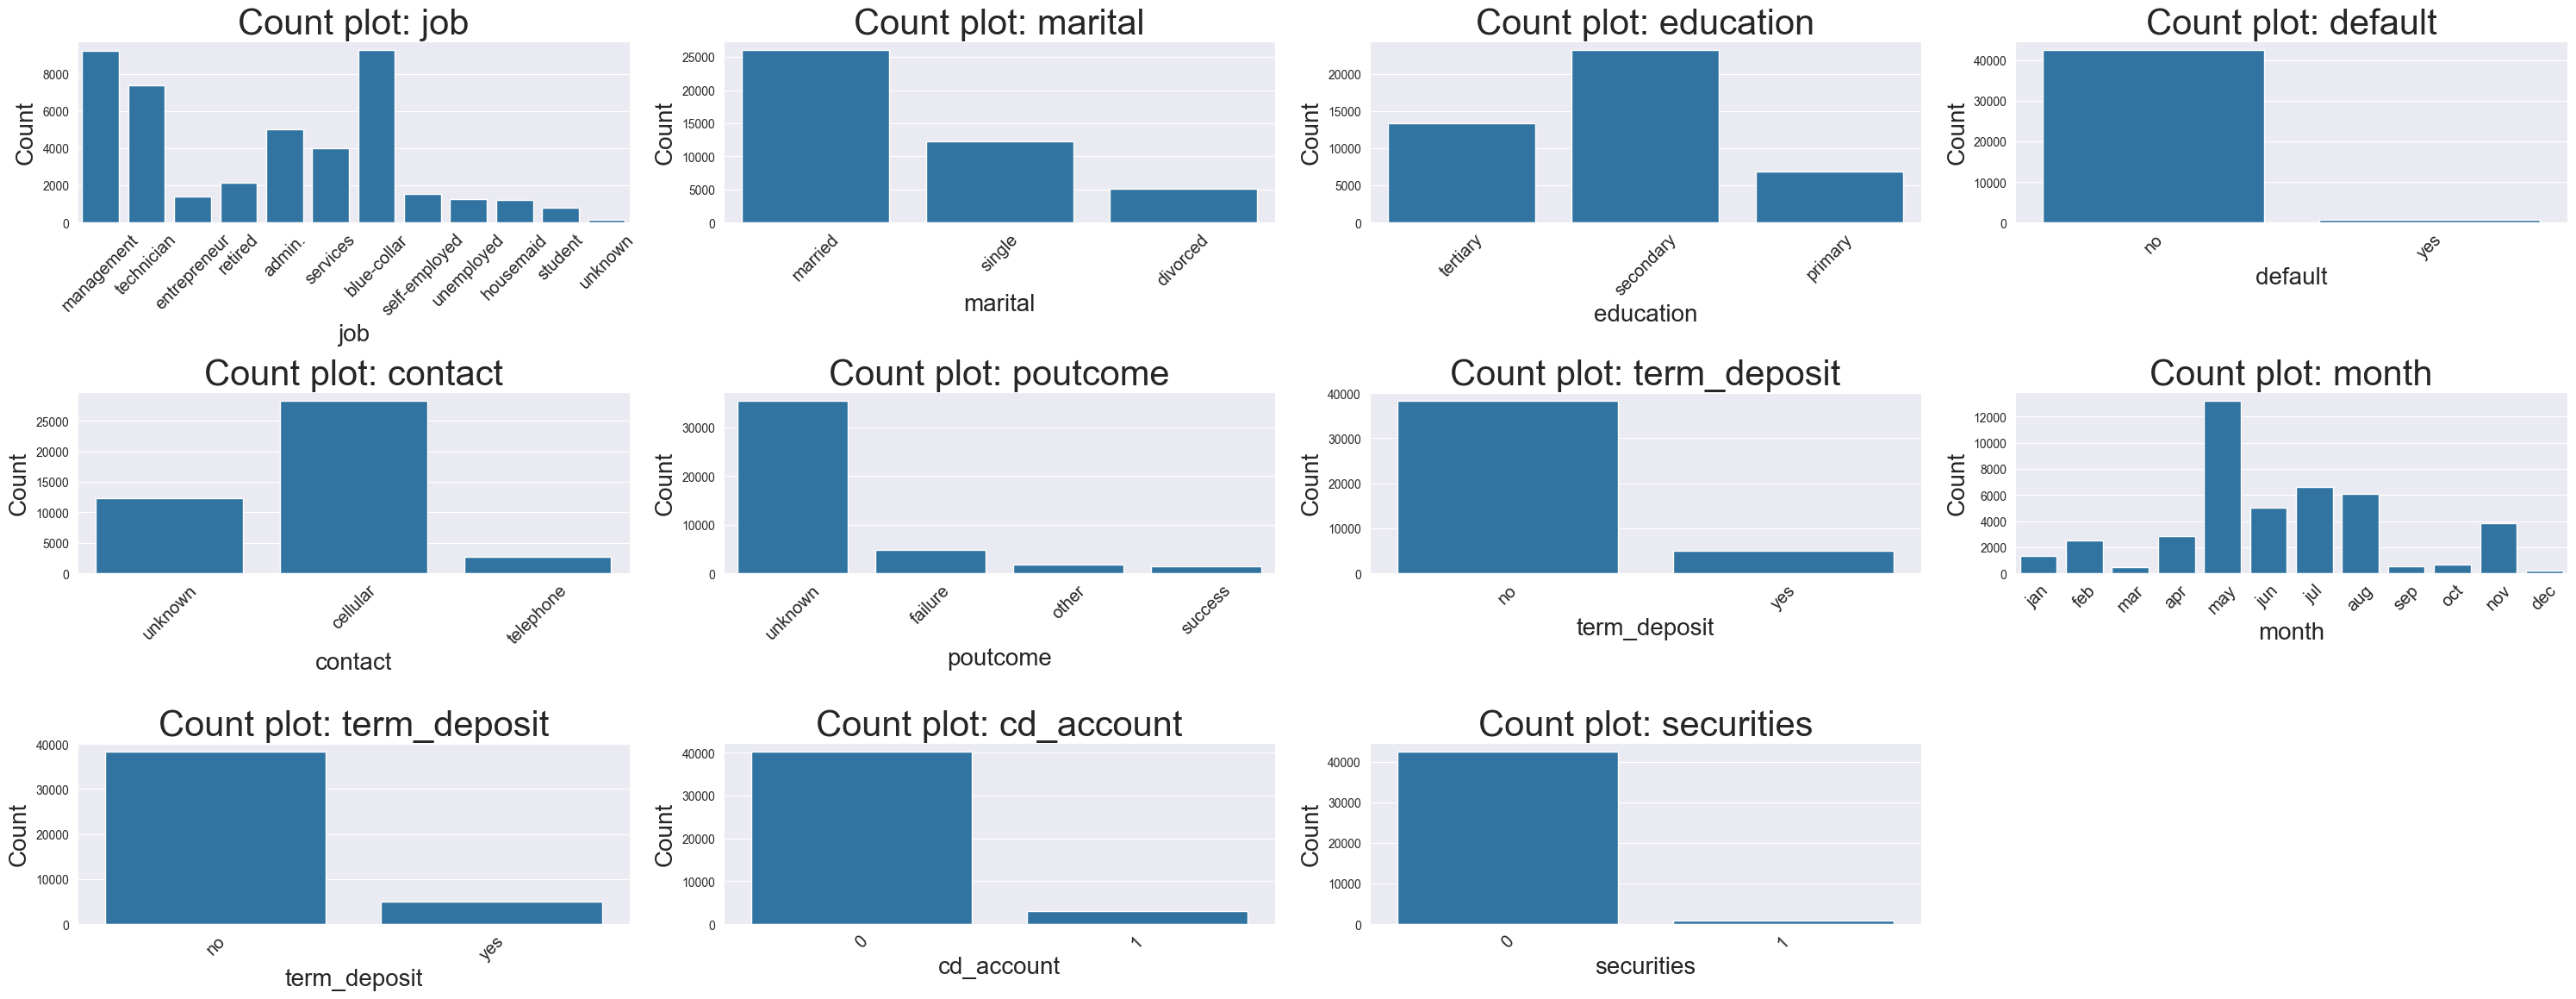

In [21]:
from matplotlib import gridspec
import seaborn as sns
cols = 4
rows = 4

fig = plt.figure(figsize=[30, 15])
gs = gridspec.GridSpec(rows, cols)
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for _i, _col_name in enumerate(categorical_columns):
    ax = plt.subplot(gs[_i])
    if _col_name != "month" :
        sns.countplot(data = data, x = _col_name, ax = ax)
    else:
        sns.countplot(data = data, x = _col_name, ax= ax, order = month_order)
    ax.set_title(f'Count plot: {_col_name}', size = 30)
    plt.setp(ax.get_xticklabels(), rotation=45, fontsize='x-large')
    ax.set_xlabel(_col_name, fontsize=20)  # Increase the size of the x-axis label
    ax.set_ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

In [22]:
numeric_columns = [_col for _col in data.columns if _col not in categorical_columns]
N = len(numeric_columns)
print(N)
print(numeric_columns)

12
['age', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'TransactionFrequency', 'Recency', 'AverageTransactionAmount', 'day']


IndexError: index 8 is out of bounds for GridSpec with size 8

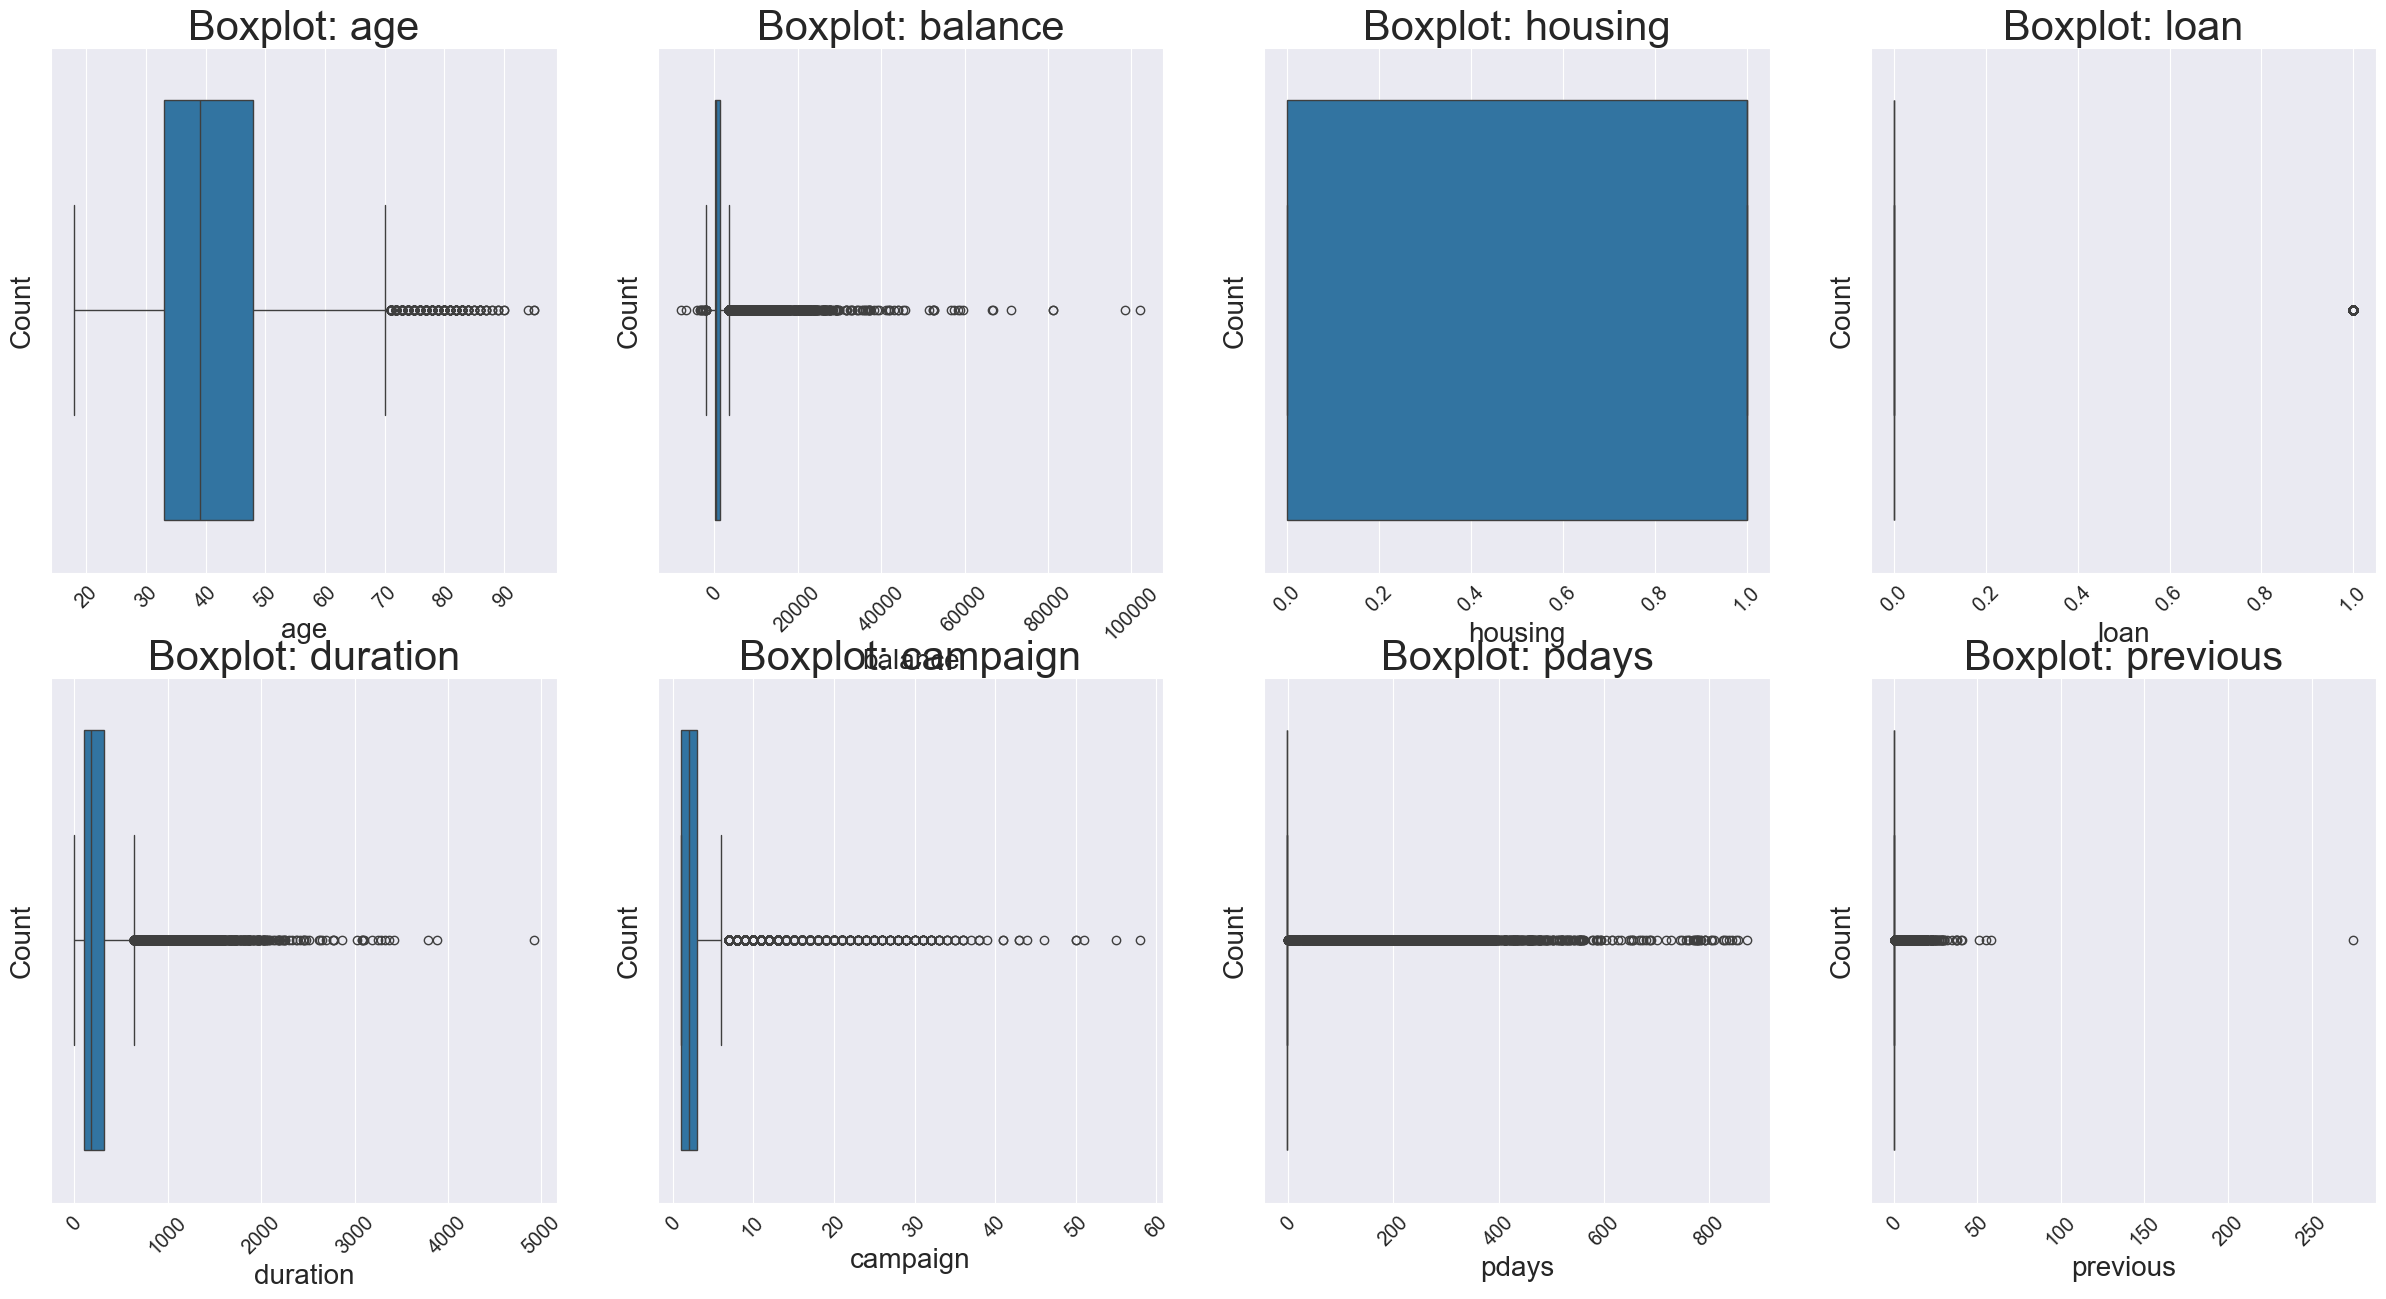

In [23]:
cols = 4
rows = 2

fig = plt.figure(figsize=[30, 15])
gs = gridspec.GridSpec(rows, cols)
for _i, _col_name in enumerate(numeric_columns):
    ax = plt.subplot(gs[_i])
    sns.boxplot(data = data, x = _col_name, ax = ax)
    ax.set_title(f'Boxplot: {_col_name}', size = 30)
    plt.setp(ax.get_xticklabels(), rotation=45, fontsize='x-large')
    ax.set_xlabel(_col_name, fontsize=20)  # Increase the size of the x-axis label
    ax.set_ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

Too many outliers and stuff in most features, use RFE to select the best features

## Data preprocessing and feature engineering

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

# Define the directory where models and encoders will be saved
model_directory = r"recommendation_models"

# Make a copy of the data to avoid modifying the original DataFrame
processed_data = data.copy()

# Encode categorical columns
for _col in categorical_columns:
    print(_col)
    encoder = LabelEncoder()  # Create a new LabelEncoder for each column
    processed_data[_col] = encoder.fit_transform(processed_data[_col])
    # Save the encoder for each categorical feature
    with open(f"{model_directory}/{_col}_encoder.pkl", "wb") as f:
        pickle.dump(encoder, f)

# Initialize and fit the scaler on all numerical columns at once
# Exclude the product columns or any other columns you don't want to scale
scaler = StandardScaler()
numerical_columns = [col for col in processed_data.columns if col not in products]
processed_data[numerical_columns] = scaler.fit_transform(processed_data[numerical_columns])

# Save the scaler
with open(f"{model_directory}/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Encoders and scaler have been saved successfully.")


job
marital
education
default
contact
poutcome
term_deposit
month
term_deposit
cd_account
securities
Encoders and scaler have been saved successfully.


In [20]:
processed_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,cd_account,securities
0,1.636763,-0.099345,-0.273464,1.279364,-0.13562,0.259146,0.885088,0,1.527535,-1.300952,0.825234,0.010854,-0.574199,-0.412047,-0.250795,0.445727,0,0,0
1,0.305821,1.435364,1.367699,-0.223604,-0.13562,-0.436276,0.885088,0,1.527535,-1.300952,0.825234,-0.415461,-0.574199,-0.412047,-0.250795,0.445727,0,0,0
2,-0.739919,-0.713229,-0.273464,-0.223604,-0.13562,-0.445158,0.885088,1,1.527535,-1.300952,0.825234,-0.706131,-0.574199,-0.412047,-0.250795,0.445727,0,0,0
3,-0.549785,-0.099345,-0.273464,1.279364,-0.13562,-0.369826,0.885088,0,1.527535,-1.300952,0.825234,-0.461968,-0.574199,-0.412047,-0.250795,0.445727,0,0,0
4,-1.215256,-0.099345,1.367699,1.279364,-0.13562,-0.298770,0.885088,1,1.527535,-1.300952,0.825234,-0.159672,-0.574199,-0.412047,-0.250795,0.445727,0,0,0


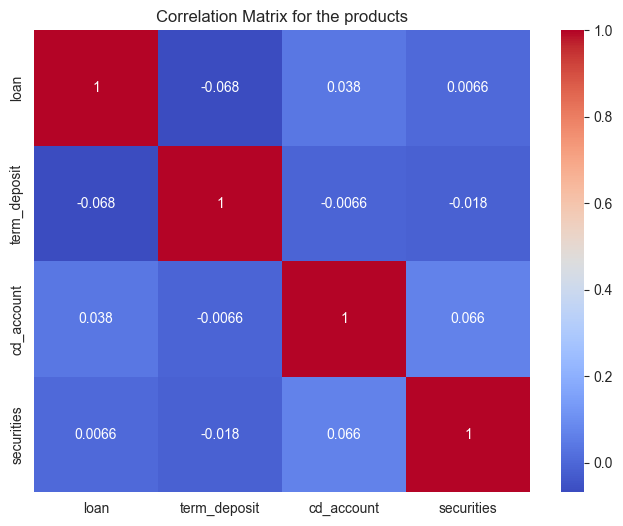

In [21]:
# Check for correlation in the products

products = ["loan", "term_deposit", "cd_account", "securities"]
product_corr = processed_data[products].corr()
plt.figure(figsize = (8,6))
sns.heatmap(product_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for the products")
plt.show()

Not correlated so feature selection have to be done seperately

In [22]:
from sklearn.model_selection import train_test_split
X = processed_data.drop(products, axis = 1)
y = processed_data[products]

In [23]:
print(y.head())

   loan  term_deposit  cd_account  securities
0     0             0           0           0
1     0             0           0           0
2     1             0           0           0
3     0             0           0           0
4     1             0           0           0


## RFE Feature Selection

In [24]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

estimators = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(kernel = 'linear'),
    GradientBoostingClassifier(),
    XGBClassifier()
]

all_feature_count = {}

for _product in products:
    X = X
    y_product = y[_product]
    smote = SMOTE(random_state = 3101)
    X_resampled, y_resampled = smote.fit_resample(X, y_product)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 3101)
    all_feature_count[_product] = {}
    for _estimator in estimators:
        rfe = RFE(estimator=_estimator, n_features_to_select = 8)
        rfe.fit(X_train, y_train)
        selected_features = X_train.columns[rfe.support_]
        for feature in selected_features:
            if feature not in all_feature_count[_product]:
                all_feature_count[_product][feature] = 0
            all_feature_count[_product][feature] += 1

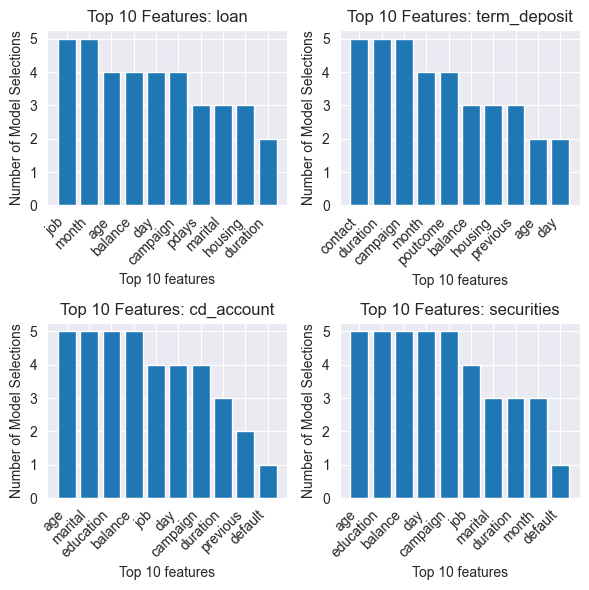

In [25]:
fig = plt.figure(figsize = (6,6))
gs = gridspec.GridSpec(2, 2)
features_selected = {}
for _i, (_product, feature_counts) in enumerate(all_feature_count.items()):
    ax = plt.subplot(gs[_i])
    sorted_features = dict(sorted(feature_counts.items(), key = lambda x: x[1], reverse = True))
    
    top_10_features = list(sorted_features.keys())[:10]
    top_10_features_count = list(sorted_features.values())[:10]
    #Select features
    features_selected[_product] = [_feature for _feature, _val in sorted_features.items() if _val > 1]
    
    ax.bar(range(len(top_10_features)), top_10_features_count, align='center')
    ax.set_xticks(range(len(top_10_features)), top_10_features, rotation = 45, ha='right')
    ax.set_xlabel("Top 10 features")
    ax.set_ylabel("Number of Model Selections")
    ax.set_title("Top 10 Features: {}".format(_product))
plt.tight_layout()
plt.show()

In [36]:
import json
import os
with open(os.path.join("recommendation_models", "features.json"), "w") as outfile:
    json.dump(features_selected, outfile)

All have different features. Conclusion, different more model for different products.

# Model Training

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.decomposition import PCA
import os
import pickle

def model_pipeline(X, y, model, param_grid = None, test_size=0.2, random_state=3101, scoring = 'accuracy'):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    if param_grid is not None:
        grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=scoring)
        
        grid_search.fit(X_resampled, y_resampled)
        
        best_pipeline = grid_search.best_estimator_
    
        y_pred = best_pipeline.predict(X_test)
    else:
        best_pipeline = pipeline
        
        best_pipeline.fit(X_resampled, y_resampled)
        
        y_pred = best_pipeline.predict(X_test)
    
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1 Score": f1_score(y_test, y_pred, average="macro"),
        "recall": recall_score(y_test, y_pred, average="macro"),
        "precision": precision_score(y_test, y_pred, average="macro"),
    }

    return metrics, best_pipeline

def print_accuracy(dict):
    for _model, _result in dict.items():
        print(f"======== {_model} =======")
        print(pd.DataFrame.from_dict(_result[0], orient="index", columns=["Value"]).T)
        
def save_pipeline(result, save_path, model_name):
    pipeline = result[model_name][1]
    save_path += f'_{model_name.replace(" ", "_").lower()}'
    file_number = 0
    while os.path.exists(save_path):
        file_number += 1
    save_path += f"_{str(file_number)}.pkl"
    with open(save_path, 'wb') as f:
        pickle.dump(pipeline, f)

model_directory = r"C:\Users\limti\PycharmProjects\DSA3101-Group-20\group_B\recommendation_models"

In [85]:
param_grids = [
    {
        'name': "Decision Tree",
        'model': DecisionTreeClassifier(),
        'params': {
            'model__criterion': ['gini', 'entropy'],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': "Random Forest",
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__bootstrap': [True, False]
        }
    },
    {
        'name': "SVM",
        'model': SVC(),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__gamma': ['scale', 'auto'],
            'model__kernel': ['linear', 'rbf']  # You can add other kernels if needed
        }
    },
    {
        'name': "Gradient Boosting",
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [50, 100],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7],
            'model__min_samples_split': [2, 5]
        }
    },
    {
        'name': "XGB Classifier",
        'model': XGBClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7],
            'model__min_child_weight': [1, 3, 5],
            'model__subsample': [0.6, 0.8, 1.0]
        }
    }
]

In [86]:
loan_result = {}

In [87]:
current_product = 'loan'
for _setting in param_grids:
    model_name = _setting['name']
    param_grid = _setting['params']
    estimator = _setting['model']
    
    loan_result = {
        **loan_result,
        model_name: model_pipeline(X[features_selected[current_product]], y[current_product], estimator)
    }
    print(f"Completed: {model_name}")

Completed: Decision Tree
Completed: Random Forest
Completed: SVM
Completed: Gradient Boosting
Completed: XGB Classifier


In [88]:
print_accuracy(loan_result)

======== Decision Tree =======
       accuracy  f1 Score    recall  precision
Value  0.714335   0.54251  0.551921   0.540832
======== Random Forest =======
       accuracy  f1 Score    recall  precision
Value  0.819052  0.577558  0.567039   0.623591
======== SVM =======
       accuracy  f1 Score    recall  precision
Value  0.576635  0.512456  0.608033   0.559206
======== Gradient Boosting =======
       accuracy  f1 Score    recall  precision
Value   0.80256  0.596428  0.587876   0.612081
======== XGB Classifier =======
       accuracy  f1 Score    recall  precision
Value  0.836005  0.571818  0.561824   0.673873


In [89]:
for _model_name, _result in loan_result.items():
    save_pipeline(loan_result, os.path.join(model_directory, "loan"), _model_name)

In [90]:
term_deposit_result = {}

In [91]:
current_product = 'term_deposit'
for _setting in param_grids:
    model_name = _setting['name']
    param_grid = _setting['params']
    estimator = _setting['model']
    
    term_deposit_result = {
        **loan_result,
        model_name: model_pipeline(X[features_selected[current_product]], y[current_product], estimator)
    }
    print(f"Completed: {model_name}")

Completed: Decision Tree
Completed: Random Forest
Completed: SVM
Completed: Gradient Boosting
Completed: XGB Classifier


In [92]:
print_accuracy(term_deposit_result)

======== Decision Tree =======
       accuracy  f1 Score    recall  precision
Value  0.714335   0.54251  0.551921   0.540832
======== Random Forest =======
       accuracy  f1 Score    recall  precision
Value  0.819052  0.577558  0.567039   0.623591
======== SVM =======
       accuracy  f1 Score    recall  precision
Value  0.576635  0.512456  0.608033   0.559206
======== Gradient Boosting =======
       accuracy  f1 Score    recall  precision
Value   0.80256  0.596428  0.587876   0.612081
======== XGB Classifier =======
       accuracy  f1 Score    recall  precision
Value  0.903356  0.767226  0.769061   0.765428


In [93]:
for _model_name, _result in term_deposit_result.items():
    save_pipeline(term_deposit_result, os.path.join(model_directory, "term_deposit"), _model_name)

In [94]:
cd_account_result = {}

In [95]:
current_product = 'cd_account'
for _setting in param_grids:
    model_name = _setting['name']
    param_grid = _setting['params']
    estimator = _setting['model']
    
    cd_account_result = {
        **loan_result,
        model_name: model_pipeline(X[features_selected[current_product]], y[current_product], estimator)
    }
    print(f"Completed: {model_name}")

Completed: Decision Tree
Completed: Random Forest
Completed: SVM
Completed: Gradient Boosting
Completed: XGB Classifier


In [96]:
print_accuracy(cd_account_result)

======== Decision Tree =======
       accuracy  f1 Score    recall  precision
Value  0.714335   0.54251  0.551921   0.540832
======== Random Forest =======
       accuracy  f1 Score    recall  precision
Value  0.819052  0.577558  0.567039   0.623591
======== SVM =======
       accuracy  f1 Score    recall  precision
Value  0.576635  0.512456  0.608033   0.559206
======== Gradient Boosting =======
       accuracy  f1 Score    recall  precision
Value   0.80256  0.596428  0.587876   0.612081
======== XGB Classifier =======
       accuracy  f1 Score    recall  precision
Value  0.949717  0.806911  0.803226   0.810709


In [97]:
for _model_name, _result in cd_account_result.items():
    save_pipeline(cd_account_result, os.path.join(model_directory, "cd_account"), _model_name)

In [98]:
securities_result = {}

In [99]:
current_product = 'securities'
for _setting in param_grids:
    model_name = _setting['name']
    param_grid = _setting['params']
    estimator = _setting['model']
    
    securities_result = {
        **loan_result,
        model_name: model_pipeline(X[features_selected[current_product]], y[current_product], estimator)
    }
    print(f"Completed: {model_name}")

Completed: Decision Tree
Completed: Random Forest
Completed: SVM
Completed: Gradient Boosting
Completed: XGB Classifier


In [100]:
print_accuracy(securities_result)

======== Decision Tree =======
       accuracy  f1 Score    recall  precision
Value  0.714335   0.54251  0.551921   0.540832
======== Random Forest =======
       accuracy  f1 Score    recall  precision
Value  0.819052  0.577558  0.567039   0.623591
======== SVM =======
       accuracy  f1 Score    recall  precision
Value  0.576635  0.512456  0.608033   0.559206
======== Gradient Boosting =======
       accuracy  f1 Score    recall  precision
Value   0.80256  0.596428  0.587876   0.612081
======== XGB Classifier =======
       accuracy  f1 Score   recall  precision
Value  0.978895  0.618106  0.58617   0.694618


In [101]:
for _model_name, _result in securities_result.items():
    save_pipeline(securities_result, os.path.join(model_directory, "securities"), _model_name)

In [1]:
cd_account_pipeline_path = r"C:\Users\limti\PycharmProjects\DSA3101-Group-20\group_B\recommendation_models\cd_account_xgb_classifier_0.pkl"
loan_pipeline_path = r"C:\Users\limti\PycharmProjects\DSA3101-Group-20\group_B\recommendation_models\loan_xgb_classifier_0.pkl"
securities_pipeline_path = r"C:\Users\limti\PycharmProjects\DSA3101-Group-20\group_B\recommendation_models\securities_xgb_classifier_0.pkl"
term_deposit_pipeline_path = r"C:\Users\limti\PycharmProjects\DSA3101-Group-20\group_B\recommendation_models\term_deposit_xgb_classifier_0.pkl"
all_features_path = r"C:\Users\limti\PycharmProjects\DSA3101-Group-20\group_B\recommendation_models\features.json"

In [2]:
import pickle
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import json
import pandas as pd
import matplotlib.pyplot as plt

cd_account_pipeline = pickle.load(open(cd_account_pipeline_path, "rb"))
loan_pipeline = pickle.load(open(loan_pipeline_path, "rb"))
securities_pipeline = pickle.load(open(securities_pipeline_path, "rb"))
term_deposit_pipeline = pickle.load(open(term_deposit_pipeline_path, "rb"))
all_features = json.load(open(all_features_path))

C:\Users\limti\PycharmProjects\DSA3101-2410\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\limti\PycharmProjects\DSA3101-2410\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:05:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\data\../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutori

In [3]:
all_features

{'loan': ['job',
  'month',
  'age',
  'balance',
  'day',
  'campaign',
  'pdays',
  'marital',
  'housing',
  'duration'],
 'term_deposit': ['contact',
  'duration',
  'campaign',
  'month',
  'poutcome',
  'balance',
  'housing',
  'previous',
  'age',
  'day',
  'pdays'],
 'cd_account': ['age',
  'marital',
  'education',
  'balance',
  'job',
  'day',
  'campaign',
  'duration',
  'previous'],
 'securities': ['age',
  'education',
  'balance',
  'day',
  'campaign',
  'job',
  'marital',
  'duration',
  'month']}

## Feature importance for cd_account

In [45]:
#Feature importance for cd_account
cd_account_model = cd_account_pipeline.named_steps['model']
cd_account_features = cd_account_model.feature_importances_
cd_account_features_name = all_features["cd_account"]

importance_df = pd.DataFrame({'Feature': cd_account_features_name, 'Importance': cd_account_features})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

     Feature  Importance
6   campaign    0.197227
3    balance    0.195163
0        age    0.187517
1    marital    0.104285
8   previous    0.092670
2  education    0.087877
4        job    0.063596
5        day    0.056556
7   duration    0.015109


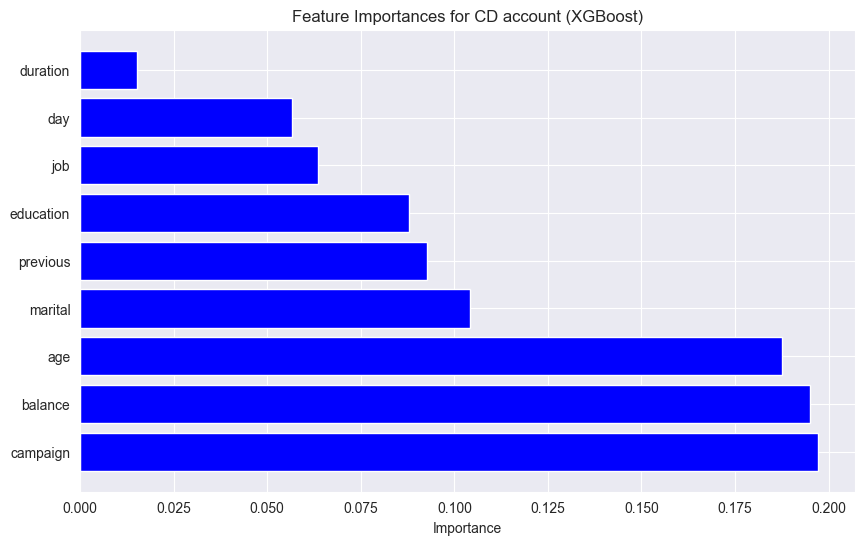

In [46]:
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Feature Importances for CD account (XGBoost)')
plt.show()

## Feature importance for Loan

In [47]:
loan_model = loan_pipeline.named_steps['model']
loan_features = loan_model.feature_importances_
loan_features_name = all_features["loan"]

importance_df = pd.DataFrame({'Feature': loan_features_name, 'Importance': loan_features})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

    Feature  Importance
5  campaign    0.306851
0       job    0.139377
1     month    0.133618
8   housing    0.090752
2       age    0.089242
4       day    0.087336
3   balance    0.059580
7   marital    0.045983
6     pdays    0.026623
9  duration    0.020638


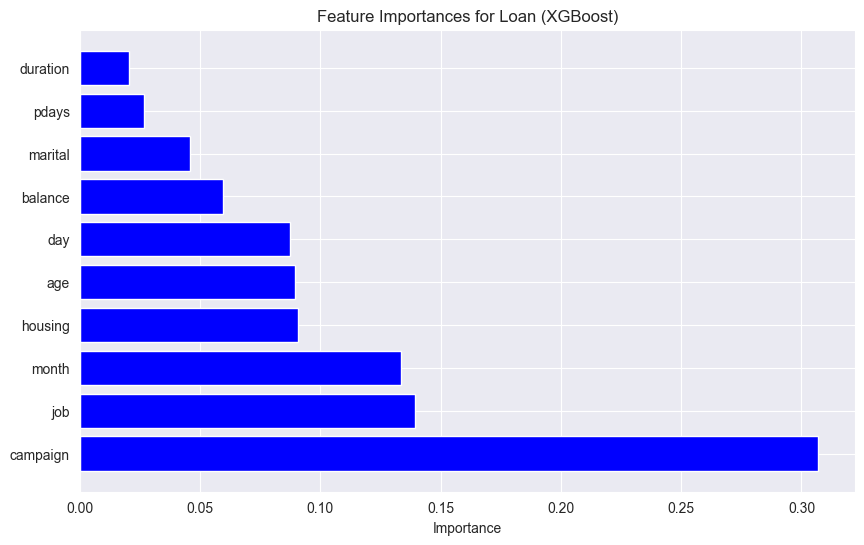

In [48]:
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Feature Importances for Loan (XGBoost)')
plt.show()

## Feature importance for Securities

In [49]:
securities_model = securities_pipeline.named_steps['model']
securities_features = securities_model.feature_importances_
securities_features_name = all_features["securities"]

importance_df = pd.DataFrame({'Feature': securities_features_name, 'Importance': securities_features})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

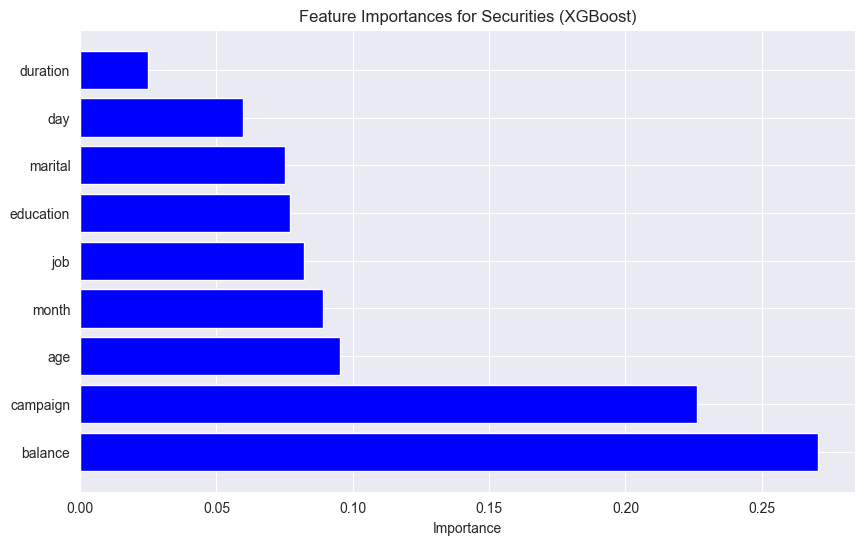

In [50]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Feature Importances for Securities (XGBoost)')
plt.show()

## Feature importance for term_deposit

In [51]:
term_deposit_model = term_deposit_pipeline.named_steps['model']
term_deposit_features = term_deposit_model.feature_importances_
term_deposit_features_name = all_features["term_deposit"]

importance_df = pd.DataFrame({'Feature': term_deposit_features_name, 'Importance': term_deposit_features})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

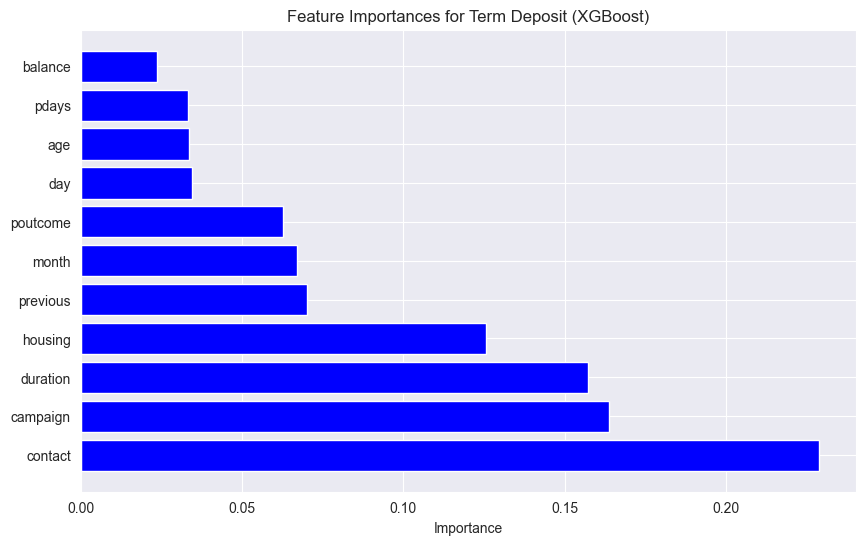

In [52]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Feature Importances for Term Deposit (XGBoost)')
plt.show()